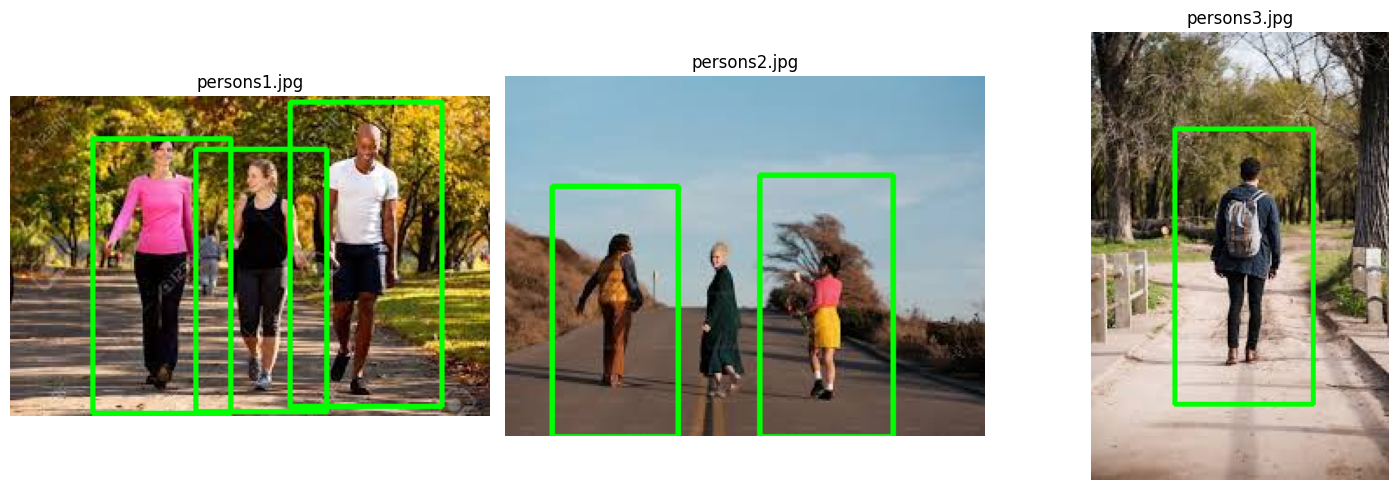

In [14]:
import cv2
import matplotlib.pyplot as plt
import os

# Carpeta donde se encuentran las imágenes
folder_path = './img/'

# Lista de nombres de archivos de las imágenes
image_files = ['persons1.jpg', 'persons2.jpg', 'persons3.jpg']

# Inicializar el descriptor HOG y establecer el detector SVM a getDefaultPeopleDetector
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Preparar la figura para subplot
plt.figure(figsize=(15, 5))

# Número total de imágenes
total_images = len(image_files)

# Iterar sobre cada imagen en la carpeta
for idx, image_file in enumerate(image_files, start=1):
    # Ruta completa de la imagen
    image_path = os.path.join(folder_path, image_file)
    
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Failed to load image: {image_file}")
        continue
    
    # Detectar personas en la imagen
    locations, _ = hog.detectMultiScale(image, winStride=(8, 8), padding=(8, 8), scale=1.05)
    
    # Convertir la imagen a RGB para visualización con matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Dibujar rectángulos alrededor de las detecciones
    for (x, y, w, h) in locations:
        cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Agregar la imagen procesada al subplot
    plt.subplot(1, total_images, idx)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(image_file)

# Mostrar todas las imágenes en una sola figura
plt.tight_layout()
plt.show()
